In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob as gb
import pickle
import cv2

In [ ]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/imthebaron/testing-face-data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: imthebaron
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/imthebaron/testing-face-data


100%|██████████| 622M/622M [00:07<00:00, 83.7MB/s]


In [ ]:
data_path = '/content/testing-face-data/yolo_faces/yolo_faces'

In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 16

399


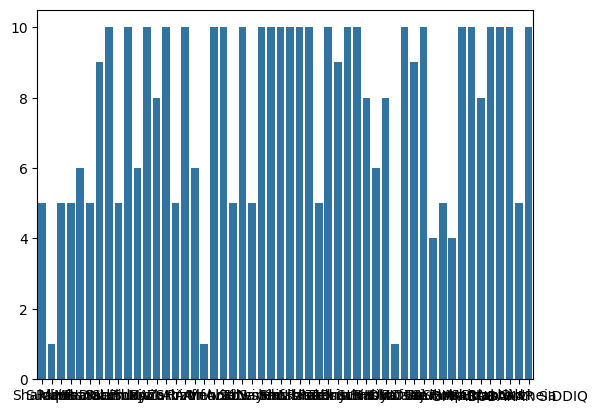

In [ ]:
classes = []
class_count = []
train_examples = 0

for f in os.listdir(data_path):
  files = gb.glob(pathname = str(data_path + '//' + f + '//' + '/*'))
  classes.append(f)
  class_count.append(len(files))
  train_examples += len(files)

sns.barplot(x=classes, y=class_count)
print(train_examples)

In [ ]:
len(classes), classes

(52,
 ['Shakibul',
  'Sudipta',
  'Ramisa',
  'Maishara',
  'MRIDUL',
  'Hasnatur',
  'Sadi',
  'Siam',
  'Prachurjo',
  'Ridoy',
  'Shaivik',
  'Rono',
  'MAYSHA',
  'Zarin',
  'Abir',
  'Rizon',
  'Afif',
  'Arnob',
  'Mehrab',
  'Avizit',
  'SUN',
  'Tahsin',
  'Kowshik',
  'Sayem',
  'Saif',
  'Hasib',
  'Khushbu',
  'Nishat',
  'Rassel',
  'Rokon',
  'Talha',
  'Dristi',
  'Tahsin Kabir',
  'Jahin',
  'Sumaiya',
  'SHUVO',
  'SHOHIDUL',
  'Ishmam',
  'Rafsan',
  'Taj',
  'Sakib',
  'Sanim',
  'ASHHAB',
  'Farhan',
  'Ashiq',
  'Apurba',
  'Shatabdi',
  'Pranto',
  'Arshad',
  'GM ABUBAKAR SIDDIQ',
  'Alvi',
  'Sintheia'])

In [ ]:
p = open('/content/classes.pkl', 'wb')
pickle.dump(classes, p)
p.close()

In [ ]:
classes = []
p = open('/content/classes.pkl', 'rb')
classes = pickle.load(p)
print(len(classes), classes)

52 ['Shakibul', 'Sudipta', 'Ramisa', 'Maishara', 'MRIDUL', 'Hasnatur', 'Sadi', 'Siam', 'Prachurjo', 'Ridoy', 'Shaivik', 'Rono', 'MAYSHA', 'Zarin', 'Abir', 'Rizon', 'Afif', 'Arnob', 'Mehrab', 'Avizit', 'SUN', 'Tahsin', 'Kowshik', 'Sayem', 'Saif', 'Hasib', 'Khushbu', 'Nishat', 'Rassel', 'Rokon', 'Talha', 'Dristi', 'Tahsin Kabir', 'Jahin', 'Sumaiya', 'SHUVO', 'SHOHIDUL', 'Ishmam', 'Rafsan', 'Taj', 'Sakib', 'Sanim', 'ASHHAB', 'Farhan', 'Ashiq', 'Apurba', 'Shatabdi', 'Pranto', 'Arshad', 'GM ABUBAKAR SIDDIQ', 'Alvi', 'Sintheia']


In [ ]:
train_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range = 0.15,
    #preprocessing_function = tf.keras.applications.vgg16.preprocess_input
    #preprocessing_function = tf.keras.applications.mobilenet.preprocess_input,
    preprocessing_function = tf.keras.applications.resnet50.preprocess_input,
    validation_split = 0.2
)

train_batches = train_gen.flow_from_directory(
    directory = data_path,
    target_size = (IMG_SIZE, IMG_SIZE),
    class_mode='sparse',
    batch_size = BATCH_SIZE,
    subset = 'training'
)

valid_batches = train_gen.flow_from_directory(
    directory = data_path,
    target_size = (IMG_SIZE, IMG_SIZE),
    class_mode='sparse',
    batch_size = BATCH_SIZE,
    subset = 'validation'
)

Found 327 images belonging to 52 classes.
Found 72 images belonging to 52 classes.


In [ ]:
class_indices = train_batches.class_indices  # Dictionary mapping class names to integer labels

# Step 2: Invert the class_indices dictionary to get a mapping from labels to class names
class_names = {v: k for k, v in class_indices.items()}

# Output class names
print(class_names)

p = open('/content/class_names.pkl', 'wb')
pickle.dump(class_names, p)
p.close()

{0: 'ASHHAB', 1: 'Abir', 2: 'Afif', 3: 'Alvi', 4: 'Apurba', 5: 'Arnob', 6: 'Arshad', 7: 'Ashiq', 8: 'Avizit', 9: 'Dristi', 10: 'Farhan', 11: 'GM ABUBAKAR SIDDIQ', 12: 'Hasib', 13: 'Hasnatur', 14: 'Ishmam', 15: 'Jahin', 16: 'Khushbu', 17: 'Kowshik', 18: 'MAYSHA', 19: 'MRIDUL', 20: 'Maishara', 21: 'Mehrab', 22: 'Nishat', 23: 'Prachurjo', 24: 'Pranto', 25: 'Rafsan', 26: 'Ramisa', 27: 'Rassel', 28: 'Ridoy', 29: 'Rizon', 30: 'Rokon', 31: 'Rono', 32: 'SHOHIDUL', 33: 'SHUVO', 34: 'SUN', 35: 'Sadi', 36: 'Saif', 37: 'Sakib', 38: 'Sanim', 39: 'Sayem', 40: 'Shaivik', 41: 'Shakibul', 42: 'Shatabdi', 43: 'Siam', 44: 'Sintheia', 45: 'Sudipta', 46: 'Sumaiya', 47: 'Tahsin', 48: 'Tahsin Kabir', 49: 'Taj', 50: 'Talha', 51: 'Zarin'}


In [ ]:
#base_model = tf.keras.applications.VGG16(include_top=False)
base_model = tf.keras.applications.ResNet50(include_top=False)
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, None, None, 3)  │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, None, None, 3)  │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, None, None, 64) │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, None, None, 64) │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, None, None, 64) │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, None, None, 64) │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, None, None, 64) │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, None, None, 64) │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, None, None, 64) │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, None, None, 64) │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, None, None, 64) │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, None, None, 64) │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, None, None, 64) │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, None, None,     │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │ 256)                   │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, None, None,     │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
img_shape = (IMG_SIZE, IMG_SIZE) + (3,)
base_model = tf.keras.applications.ResNet50(
    input_shape = img_shape,
    include_top = False,
    weights = 'imagenet'
)

In [ ]:
inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(2048, activation='relu')(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(len(classes), activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2048)                │       4,196,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 52)                  │          53,300 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,935,540 (114.20 MB)

 Trainable params: 29,882,420 (113.99 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ['accuracy']
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',   # Metric to monitor (can be 'loss', 'accuracy', etc.)
    factor=0.1,           # Factor by which the learning rate will be reduced
    patience=10,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-18           # Lower bound on the learning rate
)

In [ ]:
h = model.fit(
    train_batches,
    epochs = 50,
    steps_per_epoch = 327 // BATCH_SIZE,
    validation_data = valid_batches,
    validation_steps = 72 // BATCH_SIZE,
    callbacks = [reduce_lr]
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.9907 - loss: 0.0390 - val_accuracy: 0.8542 - val_loss: 0.6316 - learning_rate: 1.0000e-04
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 1.0000 - loss: 0.0188 - val_accuracy: 0.9000 - val_loss: 0.4826 - learning_rate: 1.0000e-04
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 297ms/step - accuracy: 0.9703 - loss: 0.0789 - val_accuracy: 0.7917 - val_loss: 0.9767 - learning_rate: 1.0000e-04
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0315 - val_accuracy: 0.9000 - val_loss: 0.1699 - learning_rate: 1.0000e-04
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 277ms/step - accuracy: 0.9784 - loss: 0.0501 - val_accuracy: 0.7812 - val_loss: 1.2008 - learning_rate: 1.0000e-04
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 0.0048 - val_accuracy: 0.8000 - val_loss: 1.0429 - learning_rate: 1.0000e-04
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 260ms/step - accuracy: 0.9944 -

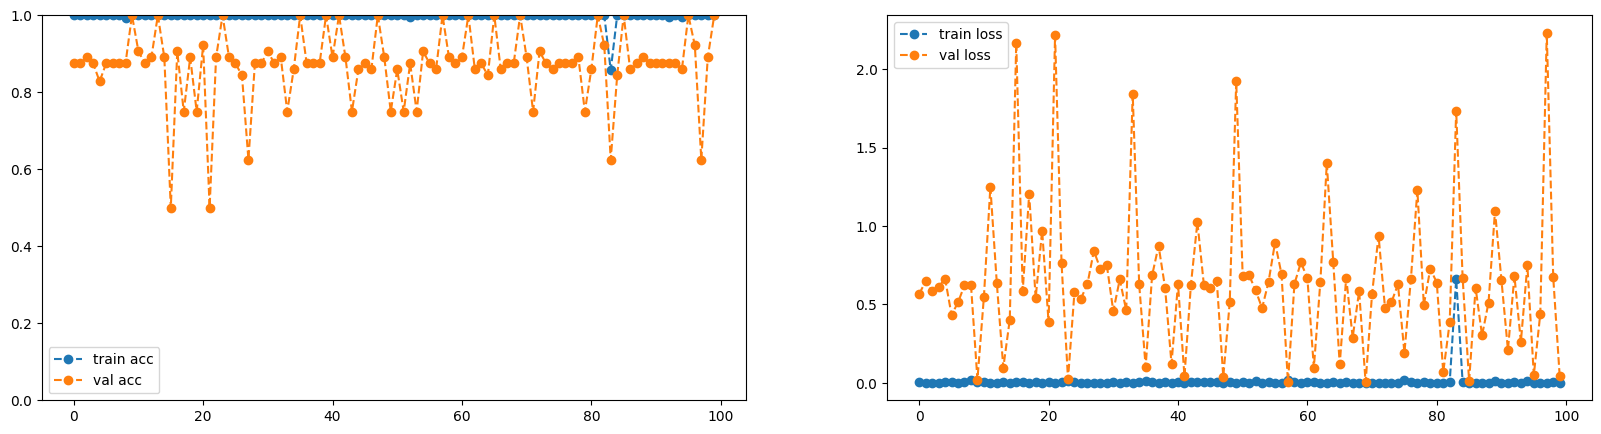

In [ ]:
plt.figure(figsize = (20, 5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--o', label='train acc')
plt.plot(h.history['val_accuracy'], '--o', label='val acc')
plt.legend()
plt.ylim([0,1])
plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--o', label='train loss')
plt.plot(h.history['val_loss'], '--o', label='val loss')
plt.legend()
plt.show()

In [ ]:
model.save('resnet50-yolo.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
 Predicted label is:Ishmam


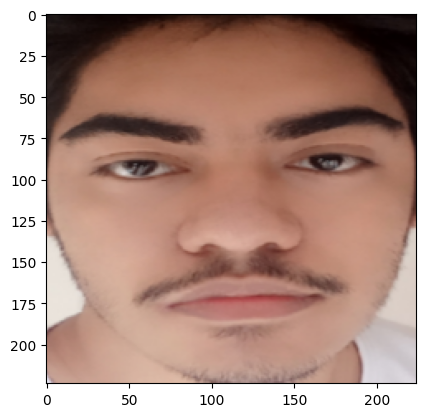

In [ ]:
import numpy as np

img = tf.keras.utils.load_img('/content/testing-face-data/yolo_faces/yolo_faces/Rono/7.png', target_size=(224, 224))
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

img_predictions = model.predict(img_array)

pred_label = class_names[np.argmax(np.round(img_predictions,2))]
print(" Predicted label is:"+ pred_label)

#if you also want to display the image that was passed use the code below
plt.imshow(img)